# Исследование закономерностей успешности игр

**Описание проекта** 

В нашем распоряжении исторические данные из открытых источников о продаже игр, оценки пользователей и экспертов, жанры и платформы.

Задача: выявить определяющие успешность игры закономерности для планирования рекламной кампании интернет-магазина "Стримчик". Нужно отработать принцип работы с данными, который позволит прогнозировать потенциально популярный продукт.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### 1. Открытие файла и изучение общей информации.

#### 1.1. Импортируем библиотеки, которые понадобятся нам в ходе работы над проектом. Считываем данные из csv-файла в датафрейм и сохраняем в переменную `df`. Путь к файлу: /datasets/games.csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import plotly.express as px

In [2]:
server_path = '/datasets/games.csv'
filename = 'games.csv'

try: 
    df = pd.read_csv(server_path, sep=',')
except: 
    df = pd.read_csv(filename, sep=',')

#### 1.2. Выводим первые 20 строчек датафрема `df` на экран.

In [3]:
df.head(20)

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### 1.3. Выведем основную информацию о датафрейме с помощью метода `info()`.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16715 non-null  int64  
 1   Name             16713 non-null  object 
 2   Platform         16715 non-null  object 
 3   Year_of_Release  16446 non-null  float64
 4   Genre            16713 non-null  object 
 5   NA_sales         16715 non-null  float64
 6   EU_sales         16715 non-null  float64
 7   JP_sales         16715 non-null  float64
 8   Other_sales      16715 non-null  float64
 9   Critic_Score     8137 non-null   float64
 10  User_Score       10014 non-null  object 
 11  Rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


#### 1.4. Изучим основные характеристики датасета в транспонированном виде методом describe().

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,16715.0,8357.000000,4825.349210,0.0,4178.5,8357.00,12535.50,16714.00
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


#### Промежуточный вывод по результатам первичного исследования данных: 
- во всех столбцах, кроме столбцов с информацией о проданных копиях, есть пропущенные значения, которые могут повлиять на дальнейший анализ данных;
- в столбце 'Year_of_Release' тип данных - float, а должен быть int, а вот в столбце 'User_Score' тип данных object, а должен быть float;
- наименования столбцов не приведены к нижнему регистру, что может повлечь ошибки при анализе;
- у некоторых игр очень низкие оценки критиков;
- самая ранняя дата выхода игры - 1980 г., а самая поздняя дата - 2016 г.;
- в столбцах с информацией о продажах игр в регионах есть нулевые значения (вероятно, некоторые игры просто не выставлены на продажу в конкретных регионах мира).

### 2. Предобработка данных

#### 2.1. Приведем наименования столбцов к нижнему регистру для удобства работы с ними. 

In [6]:
df.columns = df.columns.str.lower()

#### 2.2. Выводим количество пропущенных значений для каждого столбца в процентах.

In [7]:
df.isna().sum()/len(df)

unnamed: 0         0.000000
name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

В столбце `critic_score` пропущено более 50% значений, в столбцах `user_score` и `rating` пропущено около 40%. В столбце `year_of_release` пропущено ~2% значений, в остальных столбцах пропусков меньше 1%. Пропущенные значения отсутствуют только в столбцах с информацией о проданных копиях.

#### 2.3. Обработка пропусков и их заполнение (при возможности).

In [8]:
#посмотрим на пропуcки в столбце 'name'
df[df['name'].isnull()]

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
#пропуска всего 2, поэтому удалим строки с пропущенными значениями в столбце `name`, заполнить их мы не сможем
df.dropna(subset=['name'], inplace=True)

In [10]:
#проверим точное количество пропусков в столбце с годом выхода игры
df['year_of_release'].isna().value_counts()

False    16444
True       269
Name: year_of_release, dtype: int64

In [11]:
#пыталась сгруппировать данные, чтобы заполнить пропуски там, где есть наименование и платформа, но не вышло...
#предлагаю удалить строки с пропущенными значениями в year_of_release, т.к. их всего 269
df.dropna(subset=['year_of_release'], inplace=True)

In [12]:
#пропусков в столбце 'critic_score' много, медиану и среднее тут использовать нельзя, поэтому заполним нулями, чтобы перевести во float
df['critic_score'] = df['critic_score'].fillna(0)

In [13]:
#проверяем уникальные значения в столбце 'user_score'
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
#при выводе уникальных значений столбца 'user_score' видим значение 'tbd' (to be detrmined), что переводится как "будет определено"
#заменим все tbd в столбце user_score на NaN'ы, т.к. по факту это одно и то же
df['user_score'] = df['user_score'].where(
    df['user_score'] != 'tbd', np.NaN)

In [15]:
#заменим значения NaN в столбце 'rating' на 'unknown', т.к. рейтинг устанавливается индивидуально в каждом конкретном случае
df['rating'] = df['rating'].fillna('unknown')

In [16]:
#посчитаем количество пропусков в столбце 'user_score'
df[df['user_score'] == 'tbd']
#пропуски не заполняем, чтобы значения 'unknown' не мешали переводу во float

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### 2.4. Преобразуем типы данных.

In [17]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')
df['critic_score'] = df['critic_score'].astype('float')

In [18]:
#проверяем тип данных после преобразования
df.dtypes

unnamed: 0           int64
name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [19]:
#проверим наш датасет на полные дубликаты
df.duplicated().sum()

0

In [20]:
#проверяем неявные дубликаты
#df = df[df.duplicated(subset=['name','platform', 'year_of_release'], keep=False)]
#print(df)

In [21]:
#видим, что у нас есть неявные дубликаты (задокументировала код выше)
#удалим дубликаты в выбранных столбцах
df = df.drop_duplicates(['name', 'platform', 'year_of_release'])

In [22]:
#проверяем результат работы метода
#df = df[df.duplicated(subset=['name','platform', 'year_of_release'], keep=False)]
#print(df)

**Промежуточный вывод по результатам предобработки данных:** 

1. Полные дубликаты строк в датасете отсутствуют, однако есть неявные дубликаты, которые мы удалили.  
2. Строки с пропусками в столбцах `name` и `year_of_release` удалили, т.к. исключение таких строк не повлияет на последующий анализ, в связи с малым количеством пропущенных значений. Заполнить наименование не представляется возможным. Заполнить год релиза игры в теории возможно, спарсив данные из открытых источников, но в настоящем проекте удаляем строки, где значения отсутствуют.
3. Практически равное количество пропусков в столбцах `user_score` и `critic_score`. Поскольку оценка - вещь субъективная, заполнить пропуски медианой или средним мы не можем, поэтому оставляем пропущенные значения. Вероятно, отсутствие значений в этих двух столбцах одновременно может влиять на продажи игры. 
4. Значения 'tbd' могли появиться в столбце `user_score`, т.к. пользователь еще не успел проставить оценку, либо отказался это делать, поэтому заменили `tbd` на `NaN`.
5. Заменили типы значений в столбцах `years_of_release` и `user_score`.
6. Пропуски в данных могли возникнуть по следующим причинам:
- в столбце `critic_score` видим, что в основном оценки отсутствуют у игр, выпущенных в 90ых - 2000-ых, вероятно, это связано с тем, что игры раньше не оценивались критиками в Интернете, поэтому и нет данных, также оценка может отсутствовать у игр, выпущенных недавно и вошедших в датасет (например, у игр 2015-2016 гг.);
- данные в столбце `rating` могут отсутствовать, т.к. сама организация ESRB возникла только в 1994 г., и, соответственно, на оценку игр требуется время, поэтому у игр, выпущенных до 2000 г. часто не указан рейтинг, к тому же, если верить Википедии, организация ESRB определяет рейтинг для ПО в Канаде и США (а у нас в датасете могут быть игры, увидевшие свет в других регионах);
- пропуски в столбце `user_score` могли возникнуть по тем же причинам, что и пропуски в столбце `critic_score`, - игра еще не была оценена, либо, если игра выпущена давно, просто не подлежала оценке;
- также в датасете есть строки, в которых практически во всех столбцах пропущены значения, вероятно, такие данные попали в датасет случайно;
- пропуски в столбце `year_of_release` могли возникнуть из-за реального отсутствия информации о выпуске игры (игра была выпущена давно и данных об авторе/дате выпуска не сохранилось), либо из-за того, что год выпуска просто не был указан.

#### 2.5. Считаем суммарные продажи во всех регионах и записываем их в отдельный столбец.

In [23]:
df['sum_world_sales'] = df[[
    'na_sales',
    'eu_sales',
    'jp_sales',
    'other_sales'
]].sum(axis=1)

In [24]:
#выводим первые 5 строк датасета для проверки записи всех изменений 
df.head()

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_world_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,NaN,unknown,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,NaN,unknown,31.38


### 3. Исследовательский анализ данных

##### В рамках исследовательского анализа мы изучим следующие метрики:
1. Выпуск игр в разные годы.
2. Изменение продаж по платформам.
3. Выбор потенциально прибыльных платформ.
4. Изучение влияния на продажи внутри одной платформы отзывов пользователей и критиков. 
5. Соотнесение выводов с продажами игр на других платформах.
6. Изучение распределения игр по жанрам. 

#### 3.1. Посмотрим данные, содержащиеся в датасете, о выпуске игр в разные годы. 

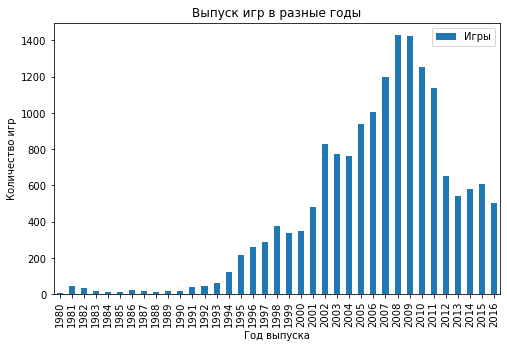

In [25]:
#применим метод pivot_table, группируем по столбцам с годом выпуска игры и названием, построим график
df.pivot_table(index='year_of_release', values='name', aggfunc='count') \
    .reset_index() \
    .plot(x='year_of_release', y='name', kind='bar', figsize=(8, 5),
          ylabel='Количество игр',
          xlabel='Год выпуска',
          title='Выпуск игр в разные годы',
          label= 'Игры')
plt.show()

Исходя из построенного графика можно сделать следующие выводы:

1. Активный выпуск игр начался в 1994 году; 
2. Больше всего релизов пришлось на период с 2002 по 2011 гг., а самый пик - 2008 - 2009 г. Вероятно, это связано с появлением в продаже каких-то абсолютно новых гаджетов, на которых можно запускать игры.

Вполне очевидно, что при планировании рекламной кампании на следующий год мы не опираемся на данные о продажах и оценках тридцатилетней давности. Однако, мы не можем опираться только на данные за прошлый и текущий годы, т.к. релизы игр происходят раз в несколько лет, соответственно, необходимо определить, за какой период нам необходимо взять статистику, чтобы проводить анализ. 

#### 3.2. Исследование изменений продаж по платформам. 

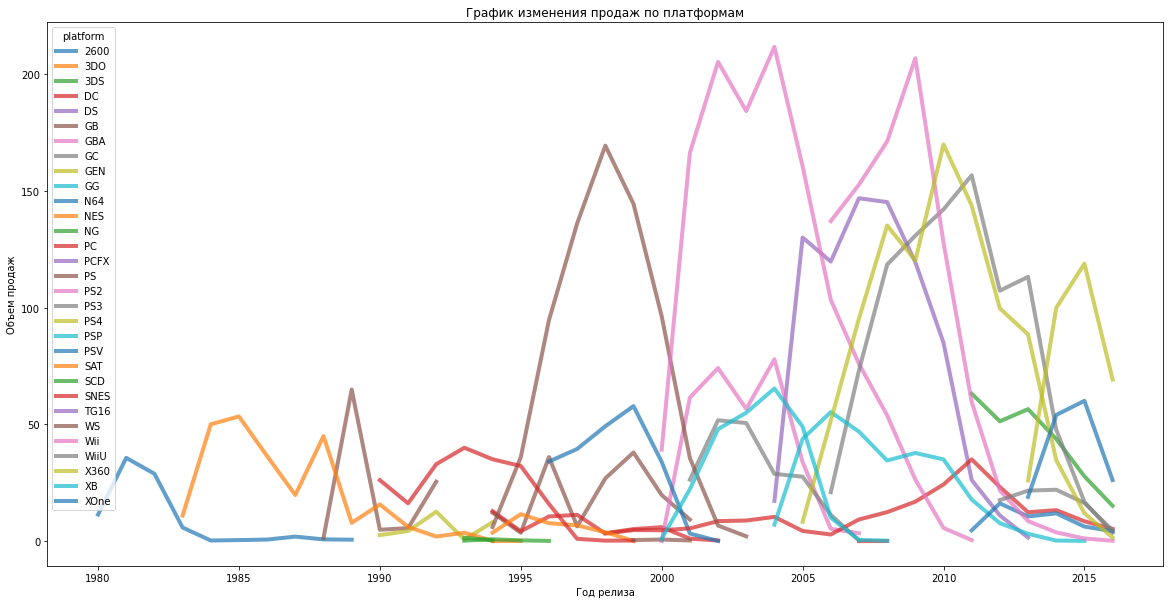

In [26]:
#построим общий график, чтобы посмотреть, как менялись продажи по платформам
df.pivot_table(index='year_of_release', columns='platform', values='sum_world_sales', aggfunc='sum').reset_index().\
plot(x='year_of_release', figsize=(20,10), lw=4, alpha=0.7)
plt.title('График изменения продаж по платформам')
plt.xlabel('Год релиза') 
plt.ylabel('Объем продаж')
plt.show()

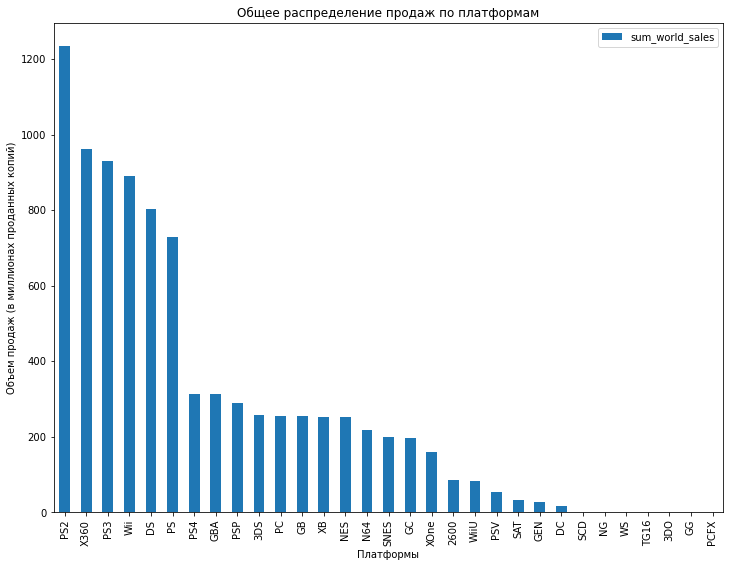

In [27]:
#посмотрим распределение продаж по платформам
df.pivot_table(index='platform',values='sum_world_sales', aggfunc='sum').sort_values(
    by='sum_world_sales', ascending=False).plot(kind='bar', figsize=(12, 9))
plt.title('Общее распределение продаж по платформам')
plt.xlabel('Платформы')
plt.ylabel('Объем продаж (в миллионах проданных копий)')
plt.show()

In [28]:
#видим, что самых популярных платформ - 6, берем их для дальнейшего исследования
top_platform = df.pivot_table(index='platform',values='sum_world_sales', aggfunc='sum').sort_values(
    by='sum_world_sales', ascending=False).reset_index().head(6)['platform']

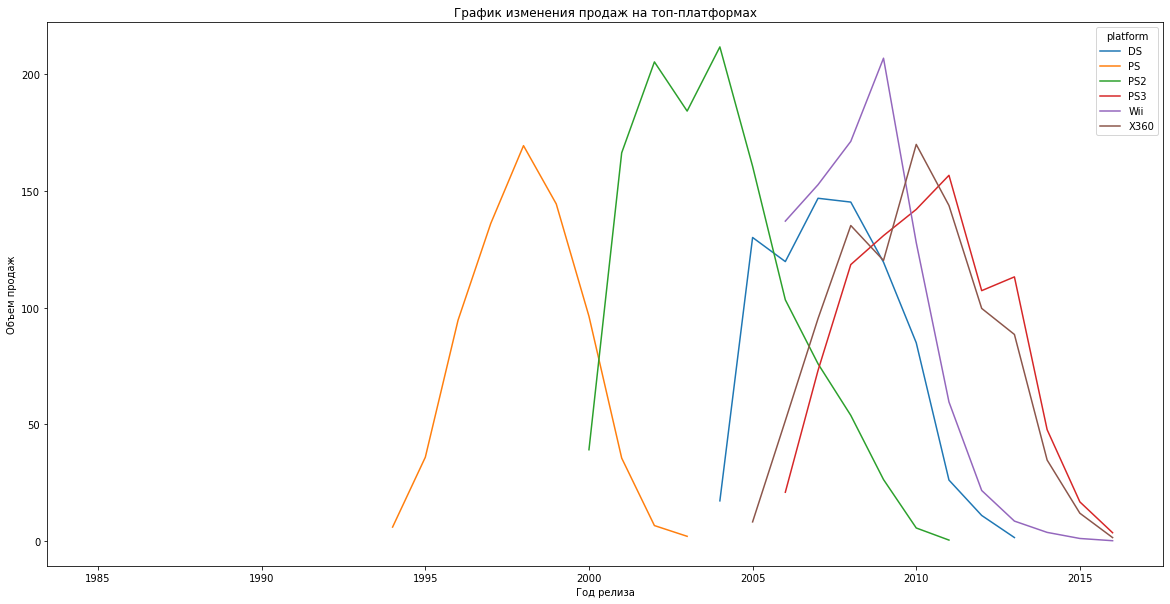

In [29]:
#построим отдельный график для самых популярных платформ
df.query('platform in @top_platform').\
pivot_table(index='year_of_release', columns='platform', values='sum_world_sales', aggfunc='sum').reset_index().\
plot(x='year_of_release', figsize=(20,10))
plt.title('График изменения продаж на топ-платформах')
plt.xlabel('Год релиза')
plt.ylabel('Объем продаж')
plt.show()

In [30]:
#подробнее исследуем, за какой срок появлялись новые и исчезали старые платформы
#создаем функцию
for platform in df['platform'].unique():
    minim = df[(df['platform'] == platform)&(df['sum_world_sales'] >= 0.1)]['year_of_release'].min()
    maxim = df[(df['platform'] == platform)&(df['sum_world_sales'] >= 0.1)]['year_of_release'].max()
    if platform in df['platform'].unique() and maxim - minim >1:
        print(f' Платформа {platform} существовала с {minim} до {maxim}: {maxim - minim} лет' )

 Платформа Wii существовала с 2006 до 2016: 10 лет
 Платформа NES существовала с 1983 до 1994: 11 лет
 Платформа GB существовала с 1988 до 2001: 13 лет
 Платформа DS существовала с 2004 до 2013: 9 лет
 Платформа X360 существовала с 2005 до 2016: 11 лет
 Платформа PS3 существовала с 2006 до 2016: 10 лет
 Платформа PS2 существовала с 2000 до 2011: 11 лет
 Платформа SNES существовала с 1990 до 1999: 9 лет
 Платформа GBA существовала с 2001 до 2007: 6 лет
 Платформа PS4 существовала с 2013 до 2016: 3 лет
 Платформа 3DS существовала с 2011 до 2016: 5 лет
 Платформа N64 существовала с 1996 до 2001: 5 лет
 Платформа PS существовала с 1994 до 2003: 9 лет
 Платформа XB существовала с 2000 до 2008: 8 лет
 Платформа PC существовала с 1992 до 2016: 24 лет
 Платформа 2600 существовала с 1980 до 1989: 9 лет
 Платформа PSP существовала с 2004 до 2013: 9 лет
 Платформа XOne существовала с 2013 до 2016: 3 лет
 Платформа WiiU существовала с 2012 до 2016: 4 лет
 Платформа GC существовала с 2001 до 2007: 

**После исследования графиков и данных можем сделать следующие промежуточные выводы:**

1. Срок жизни платформ в среднем около 8 лет. После выхода платформы она стремительно набирает популярность, а затем популярность со временем падает. Популярность падает в связи с выходом новой платформы (это видно на примере PlayStation). 
2. По продажам лидируют следующие 6 платформ: PS2, X360, PS3, Wii, DS, PS. Фактически это 3 версии консоли PlayStation, игровая приставка X360 от компании Microsoft, Wii и DS от Nintendo.
3. Для последующего анализа берем данные с 2013 года, как наиболее релевантные.
4. Для выбора нескольких потенциально прибыльных платформ сопоставим данные с графика с распределением продаж по платформам и сроком жизни платформы. В результате анализа выбор падает на следующие платформы: Wii, X360, PS3, PS4 (как преемник PS3). 

#### 3.3. Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [31]:
#делаем срез по релизам, чтобы у нас были актуальные данные (еще раз: берем данные с 2013 по 2016 гг.)
year_df = df.query('year_of_release >= 2013')

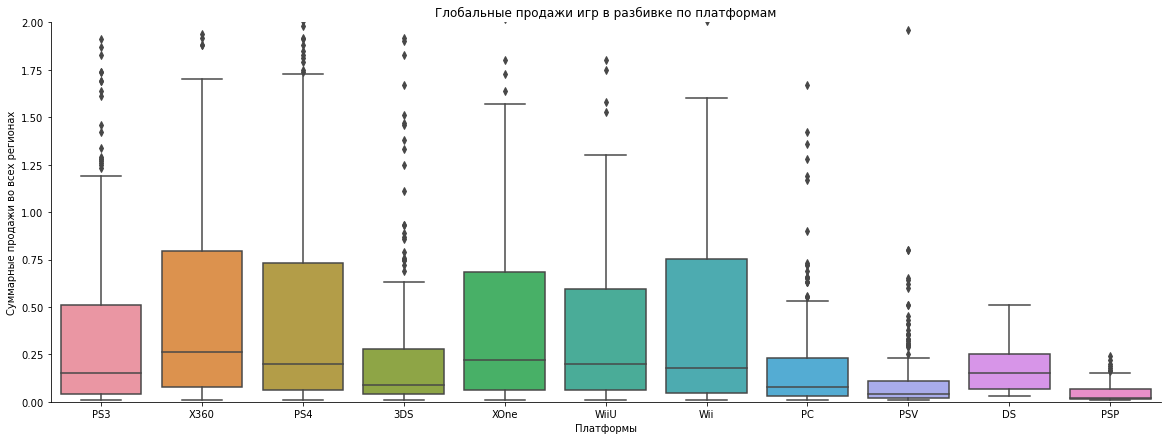

In [32]:
# строим график
sns.catplot(x="platform", 
            y='sum_world_sales',
            kind="box", 
            data=year_df,  
            height=6, 
            aspect=2.7)
_ = plt.ylim(0, 2)
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.ylabel('Суммарные продажи во всех регионах')
plt.xlabel('Платформы')
plt.show()

**После исследования графика "ящик с усами" мы можем сделать следующие промежуточные выводы:**

Подтверждаем ранее сделанный вывод о том, что больше всего продаж приходится на консоли PlayStation, Microsoft и Nintendo. Колоссальные продажи у X360 и PS4.
По медианным значениям видим, что игры на PS4 продаются лучше, чем игры на его предшественнике - PS3. 

#### 3.4. Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы .

In [33]:
#влияние отзывов сначала будем оценивать по платформе PS4, как самой актуальной и популярной
#чтобы ниже оценить влияние оценок критиков на продажи уберем нули, которыми мы ранее заполнили пропуски
ps4 = df.query('platform == "PS4" and (critic_score != 0)')

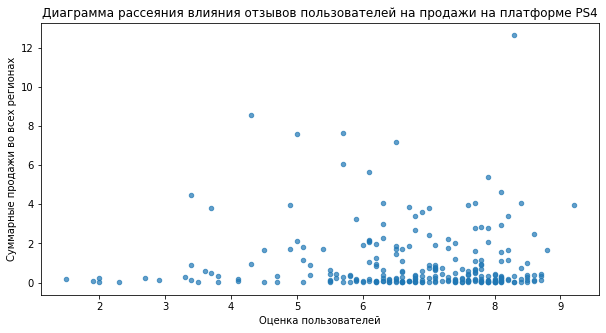

In [34]:
#построим диаграмму рассеивания для оценки зависимости продаж игр от отзывов пользователей
ps4.plot(x='user_score', y='sum_world_sales', kind='scatter', figsize=(10,5), alpha=0.7)
plt.title('Диаграмма рассеяния влияния отзывов пользователей на продажи на платформе PS4')
plt.ylabel('Суммарные продажи во всех регионах')
plt.xlabel('Оценка пользователей')
plt.show()

In [35]:
#посмотрим корреляцию между отзывами пользователей и продажами для платформы PS4
print('Корреляция между отзывами пользователей и продажами для платформы PS4 составляет:', 
      ps4['sum_world_sales'].corr(ps4['user_score']))

Корреляция между отзывами пользователей и продажами для платформы PS4 составляет: -0.03362497596528878


Исходя из построенной диаграммы рассеяния и посчитанной корреляции можем сделать вывод, что отзывы пользователей не влияют на продажи игр на платформе PS4.

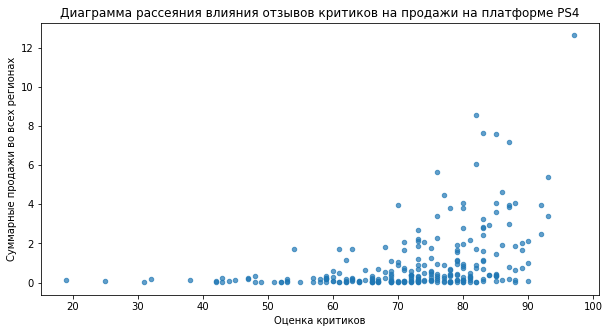

In [36]:
#построим диаграмму рассеивания для оценки зависимости продаж игр от отзывов критиков
ps4.plot(x='critic_score', y='sum_world_sales', kind='scatter', figsize=(10,5), alpha=0.7)
plt.title('Диаграмма рассеяния влияния отзывов критиков на продажи на платформе PS4')
plt.ylabel('Суммарные продажи во всех регионах')
plt.xlabel('Оценка критиков')
plt.show()

In [37]:
#посмотрим корреляцию между отзывами критикоы и продажами для платформы PS4
print('Корреляция между отзывами критиков и продажами для платформы PS4 составляет:', 
      ps4['sum_world_sales'].corr(ps4['critic_score']))

Корреляция между отзывами критиков и продажами для платформы PS4 составляет: 0.406567902061781


Исходя из построенной диаграммы рассеяния и посчитанной корреляции можем сделать вывод, что отзывы критиков не сильно влияют на продажи игр на платформе PS4, т.к. корреляция 0.40 говорит о наличии связи, однако не слишком сильной. Выходит, что в некоторых случаях отзывы критиков влияют на продажи игр на конкретной платформе, но не всегда.

In [38]:
#оценим коэффициент коррелляции для ранее выбранных нами платформ с данными с 2013 года
for platform in ['PS3', 'X360', 'Wii']:
    print('\n{0}:'.format(platform))
    for column in ['user_score', 'critic_score']:
        temp = year_df.query('platform == @platform and (user_score != -1) and (critic_score != 0)')
        print('Коэффициент корреляции {0} и sum_world_sales: {1}'.\
              format(column, round(temp[column].corr(temp['sum_world_sales']), 2)))


PS3:
Коэффициент корреляции user_score и sum_world_sales: 0.02
Коэффициент корреляции critic_score и sum_world_sales: 0.33

X360:
Коэффициент корреляции user_score и sum_world_sales: -0.01
Коэффициент корреляции critic_score и sum_world_sales: 0.35

Wii:
Коэффициент корреляции user_score и sum_world_sales: nan
Коэффициент корреляции critic_score и sum_world_sales: nan


Исследованные нами коэффициенты корреляции для платформ PS3, X360 и Wii показывают схожие результаты, как и для платформы PS4. Зависимости между продажами и оценками пользователей не найдено. Зависимость между продажами и оценками критиков слабая. 

#### 3.5. Изучение общего распределения игр по жанрам.

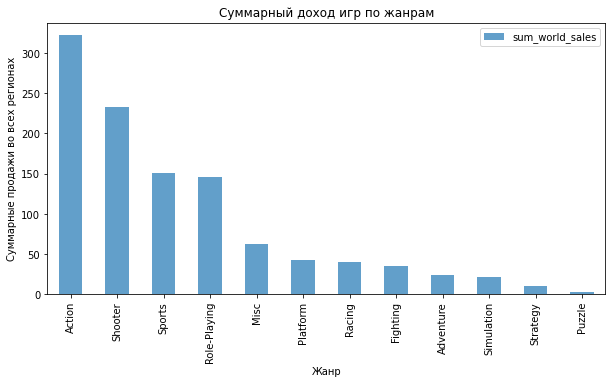

In [39]:
#посмотрим на суммарный доход игр в разрезе жанров
year_df.groupby('genre')['sum_world_sales'].sum().reset_index().sort_values(by = 'sum_world_sales', ascending = False).\
plot(x="genre", y="sum_world_sales", kind='bar', figsize=(10,5), alpha=0.7)
plt.title('Суммарный доход игр по жанрам')
plt.ylabel('Суммарные продажи во всех регионах')
plt.xlabel('Жанр')
plt.show()

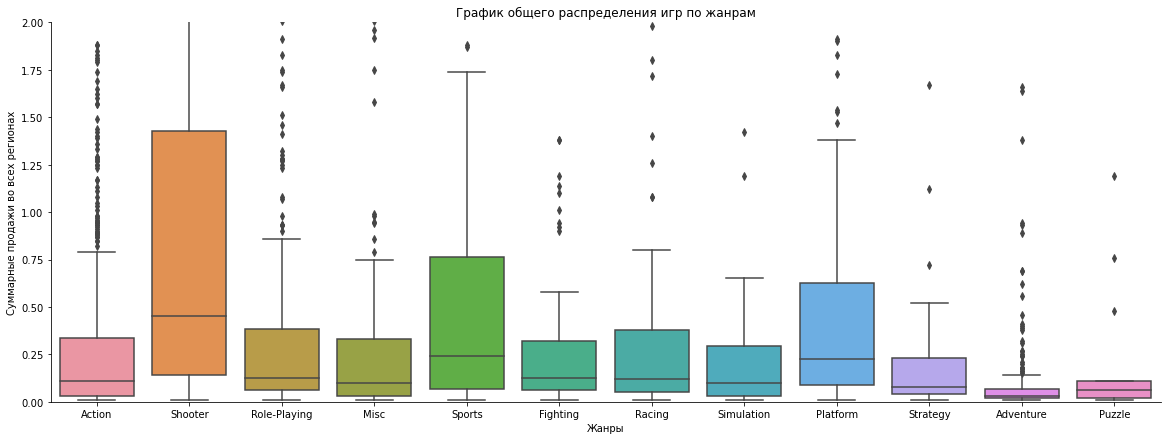

In [40]:
#построим график общего распределения игр по жанрам
sns.catplot(x="genre", 
            y='sum_world_sales',
            kind="box", 
            data=year_df,  
            height=6, 
            aspect=2.7)
_ = plt.ylim(0, 2)
plt.title('График общего распределения игр по жанрам')
plt.ylabel('Суммарные продажи во всех регионах')
plt.xlabel('Жанры')
plt.show()

Суммарные продажи самые большие в жанрах Action, Shooter, Sports и Role-Playing. Однако стабильно высокий доход приносят игры из жанра Shooter. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Также ниже проверим, совпадает ли распределение игр по жанрам в разных регионах мира. 

### 4. Составляем портрет пользователя в каждом из регионов (NA, EU, JP).

Определим для пользователя каждого региона (NA, EU, JP):

- cамые популярные платформы (топ-5), опишем различия в долях продаж;
- самые популярные жанры (топ-5), поясним разницу;
- влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [41]:
#создадим функцию для создания графиков, чтобы упростить себе жизнь на следующих этапах
#для исследования берем данные с 2013 года

def user_data(groupby, region_sales, ax):
    pivot = year_df.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    plot = pivot.plot(kind='bar', ax=axes[ax], 
                   fontsize=18)

#### 4.1. Изучим популярность платформ в разных странах.

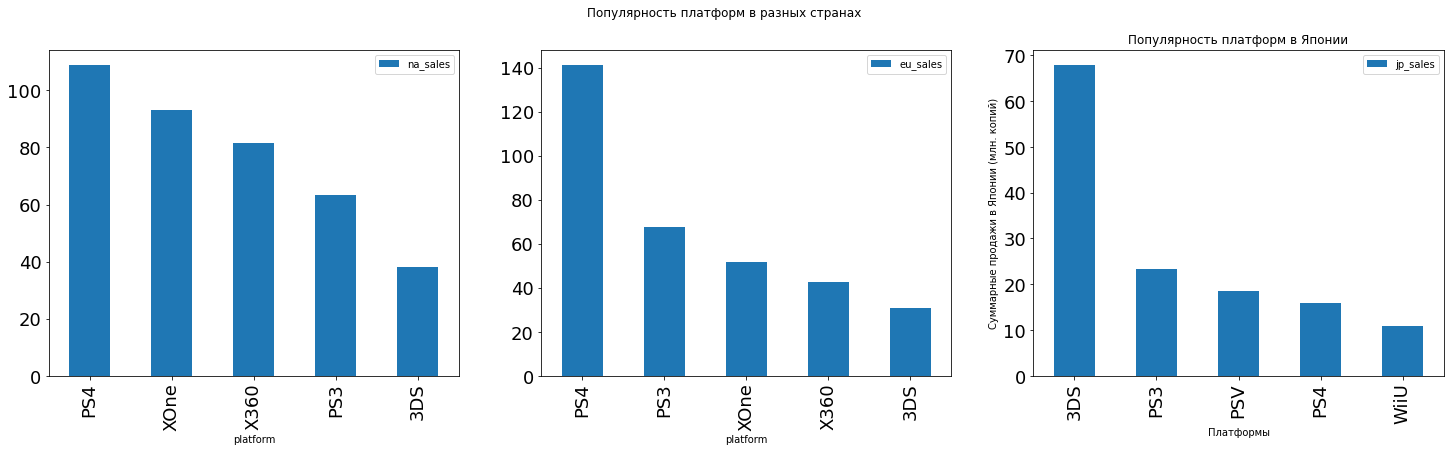

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
fig.suptitle('Популярность платформ в разных странах')

user_data('platform', 'na_sales', 0)
plt.title('Популярность платформ в Серверной Америке')
plt.ylabel('Суммарные продажи в Северной Америке (млн. копий)')
plt.xlabel('Платформы')

user_data('platform', 'eu_sales', 1)
plt.title('Популярность платформ в Европе')
plt.ylabel('Суммарные продажи в Европе (млн. копий)')
plt.xlabel('Платформы')

user_data('platform', 'jp_sales', 2)
plt.title('Популярность платформ в Японии')
plt.ylabel('Суммарные продажи в Японии (млн. копий)')
plt.xlabel('Платформы')
plt.show()

В Северной Америке и Европе популярны одни и те же платформы: PS4 является самой популярной в обоих регионах, однако продажи PS4 в Европе намного выше, чем в США, т.к. в США большУю долю рынка занимают платформы Microsoft. 
В Японии картина совсем другая - лидером по популярности среди платформ является 3DS.

#### 4.2. Изучим популярность жанров в разных странах.

В части жанров ситуация схожа с выводами, обозначенными выше: в Северной Америке и Европе одинаково популярны жанры экшн, шутеры и спорт, а в Японии первое место по популярности занимают ролевые игры, однако на втором месте также экшны.  

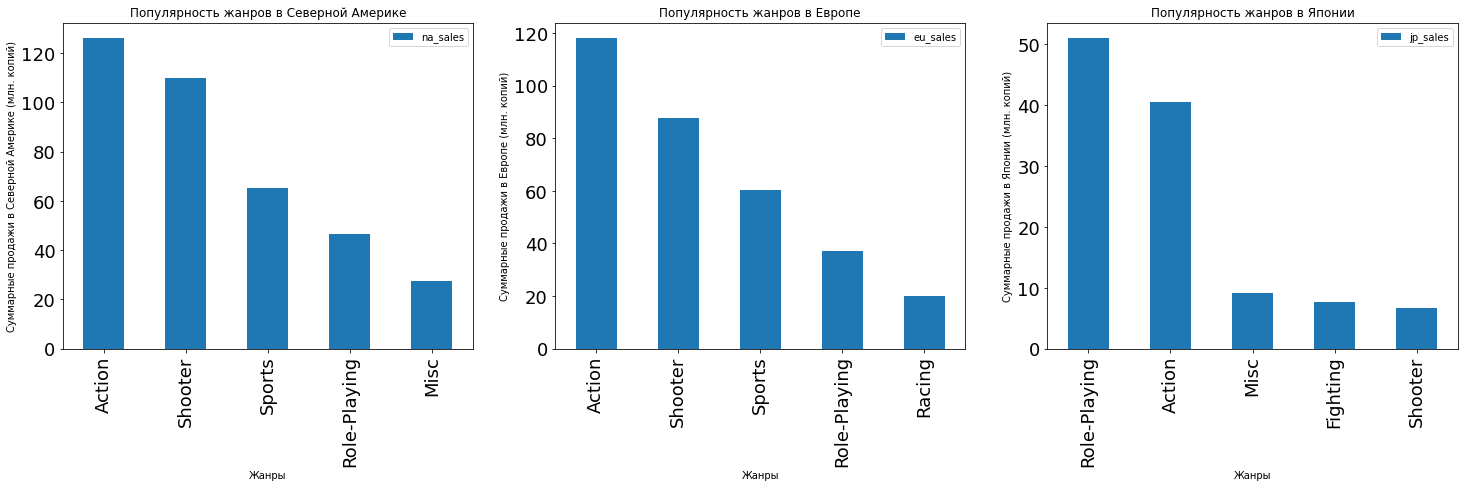

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

user_data('genre', 'na_sales', 0)
axes[0].set_title('Популярность жанров в Северной Америке')
axes[0].set_ylabel('Суммарные продажи в Северной Америке (млн. копий)')
axes[0].set_xlabel('Жанры')

user_data('genre', 'eu_sales', 1)
axes[1].set_title('Популярность жанров в Европе')
axes[1].set_ylabel('Суммарные продажи в Европе (млн. копий)')
axes[1].set_xlabel('Жанры')

user_data('genre', 'jp_sales', 2)
axes[2].set_title('Популярность жанров в Японии')
axes[2].set_ylabel('Суммарные продажи в Японии (млн. копий)')
axes[2].set_xlabel('Жанры')

plt.show()

#### 4.3. Изучим влияние рейтинга ESRB на продажи в отдельном регионе.

In [44]:
#посмотрим на уникальные значения рейтинга в столбце 'rating' (только данные с 2013 года)
year_df['rating'].unique()

array(['M', 'unknown', 'E', 'T', 'E10+'], dtype=object)

In [45]:
#посмотрим влияние рейтинга ESRB на продажи в Северной Америке
na_rating_pivot_table = pd.pivot_table(year_df, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating_pivot_table

,na_sales
rating,
M,165.21
unknown,89.42
E,79.05
E10+,54.24
T,49.79


In [46]:
#посмотрим влияние рейтинга ESRB на продажи в Европе
eu_rating_pivot_table = pd.pivot_table(year_df, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating_pivot_table

,eu_sales
rating,
M,145.32
E,83.36
unknown,78.91
E10+,42.69
T,41.95


In [47]:
#посмотрим влияние рейтинга ESRB на продажи в Японии
jp_rating_pivot_table = pd.pivot_table(year_df, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating_pivot_table

,jp_sales
rating,
unknown,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


In [48]:
#создадим аналогичную функцию,

В США и Европе по продажам лидируют игры с рейтингом М - "для взрослых", что означает что материалы игры не подходят для лиц младше 17 лет (тут видим прямую взаимосвязь с самыми продаваемыми жанрами в США и ЕС - экшны и шутеры). Примерно одинаковое количество продаж у игр с рейтингом E - "для всех". В Японии же самые популярные игры, у которых рейтинг не определен, далее по популярности игры с рейтингом 'T' - "подросткам", что означает, что материалы игры подходят для лиц от 13 лет. 

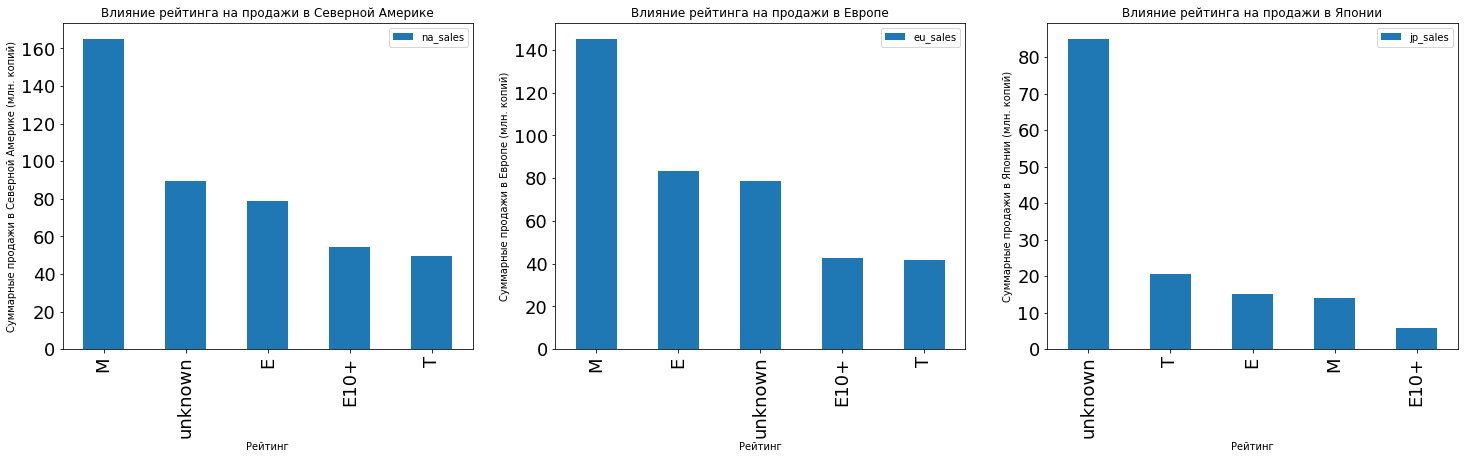

In [49]:
#используем ранее созданную функцию
fig, axes = plt.subplots(1, 3, figsize=(25,6))

user_data('rating', 'na_sales', 0)
axes[0].set_title('Влияние рейтинга на продажи в Северной Америке')
axes[0].set_ylabel('Суммарные продажи в Северной Америке (млн. копий)')
axes[0].set_xlabel('Рейтинг')

user_data('rating', 'eu_sales', 1)
axes[1].set_title('Влияние рейтинга на продажи в Европе')
axes[1].set_ylabel('Суммарные продажи в Европе (млн. копий)')
axes[1].set_xlabel('Рейтинг')

user_data('rating', 'jp_sales', 2)
axes[2].set_title('Влияние рейтинга на продажи в Японии')
axes[2].set_ylabel('Суммарные продажи в Японии (млн. копий)')
axes[2].set_xlabel('Рейтинг')

plt.show()

### 5. Проверка гипотез

Нам необходимо проверить 2 гипотезы, сформулированные заказчиком:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки гипотез о равенстве средних двух генеральных совокупностей воспользуемся параметрическим тестом - критерием Стьюдента. В нашем случае генеральные совокупности не зависят друг от друга, а исследуемые величины нормально распределены, к тому же у нас в тесте достаточно наблюдений.

#### 5.1.  Проверка первой гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_a: Средние пользовательские рейтинги платформ Xbox One и PC различаются.
Установим порог статистической значимости (alpha) 5%.

In [50]:
#берем стандартную alpha
alpha = 0.05

#поскольку нам необходимо проверить гипотезу о равенстве среднего двух генеральных совокупностей, то воспользуемся методом scipy.stats.ttest_ind 
results = st.ttest_ind(year_df.query('platform == "XOne" and user_score.isna()==False')['user_score'],
                       year_df.query('platform == "PC" and user_score.isna()==False')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


In [51]:
#дополнительно сверимся при помощи метода mean()
year_df.query('platform == "XOne" or platform == "PC"').\
pivot_table(index='platform', values='user_score', aggfunc='mean')

,user_score
platform,
PC,6.269677
XOne,6.521429


P-значение является высоким, нулевую гипотезу мы не отвергаем. Можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Дополнительная проверка это подтверждает: у PC средняя пользовательская оценка составляет 6.26, а у XOne - 6.52.

#### 5.2. Проверка второй гипотезы: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные."

H_0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
H_a: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Установим порог статистической значимости (alpha) 5%.

In [52]:
#берем стандартную alpha
alpha = 0.5

#поскольку нам необходимо проверить гипотезу о равенстве среднего двух генеральных совокупностей, то воспользуемся методом scipy.stats.ttest_ind 
results = st.ttest_ind(year_df.query('genre == "Action" and user_score.isna()==False')['user_score'],
                       year_df.query('genre == "Sports" and user_score.isna()==False')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


In [53]:
#дополнительно сверимся при помощи метода mean()
year_df.query('genre == "Action" or genre == "Sports"').\
pivot_table(index='genre', values='user_score', aggfunc='mean')

,user_score
genre,
Action,6.837532
Sports,5.238125


В результате анализа мы видим, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Отклоняем нулевую гипотезу и принимаем альтернативную.

### 6. Общий вывод

В рамках проекта по исследованию закономерностей успешности игр мы провели предобработку данных, осуществили исследовательский анализ, составили портрет пользователя в 3 регионах мира: Северная Америка, Европа и Япония, а также проверили 2 гипотезы.

В процессе анализа выпуска игр в разные годы установили, что активный выпуск игр начался в 1994 году, а больше всего релизов пришлось на период с 2002 по 2011 гг., также выявили, что срок жизни платформ в среднем около 8 лет. 

Для прогнозирования рынка на 2017 год брали данные с 2013 по 2016 годы. 
Было установлено, что:
1. Самыми прибыльными платформами являются консоли PlayStation (PS3 и PS4), Microsoft (XOne) и Nintendo (Wii, DS), поэтому в рекламных кампаниях следует сосредоточиться на них (с учетом распределения продаж в исследованных регионах мира).
2. Стабильно высокий доход приносят игры жанра Shooter.
3. Отзывы критиков и пользователей не влияют на успешные продажи игр, соответственно, на них не ориентируемся. 
4. Рынки США и Европы кардинально отличаются от рынка Японии: 
- в США и Европе самыми популярными жанрами игр являются экшны и шутеры, а в Японии пользователи больше всего интересуются жанром role-playing;
- в США и Европе больше всего продаж приходится на PS4, при чем в Европе продажи игр для этой платформы выше, чем в США, а в Японии на 3DS;
- В США и Европе по продажам лидируют игры с рейтингом М - "для взрослых", а в Японии лидируют по продажам игры с неопределенным рейтингом, а следующими в топе являюся игры с рейтингом T - "подросткам".

*Вывод по сформулированным в начале проекта гипотезам:*
1. Можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.